A second pyroot script that reads that output and produce 1D histograms to superimpose, in order to compare the leeading lepton pt for electron and muons, and one to compare the pt distribution for b-jets (the ones with trueflav==5) vs non-b-jets (all the others).

In [1]:
# Import libraries

%reset -f
from ROOT import *
from include import ROOTHelper, Helper
from array import array

Welcome to JupyROOT 6.26/10


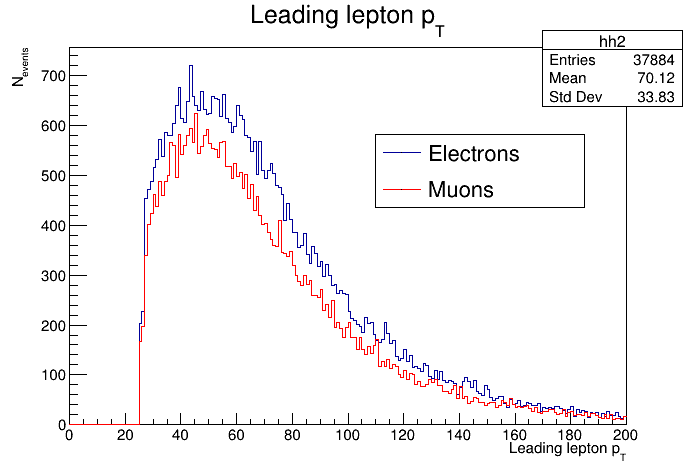

In [2]:
FileIn = TFile.Open("OutputTree.root","READ")
NewMini = FileIn.Get("NewMini")
leg = TLegend(0.54,0.56, 0.84,0.715)

cc = TCanvas()
cc.Draw()
NewMini.Draw("Newlep_pt>>hh1(200, 0,200)", "Newlep_type==11", "")
electron = FileIn.Get("hh1")
leg.AddEntry(electron, "Electrons")
electron.SetTitle("Leading lepton p_{T}")
electron.GetXaxis().SetTitle("Leading lepton p_{T}")
electron.GetYaxis().SetTitle("N_{events}")
NewMini.Draw("Newlep_pt>>hh2(200, 0,200)", "Newlep_type==13", "sames")
muon = FileIn.Get("hh2")
muon.SetLineColor(kRed)
leg.AddEntry(muon, "Muons")

leg.Draw()
gPad.Update()

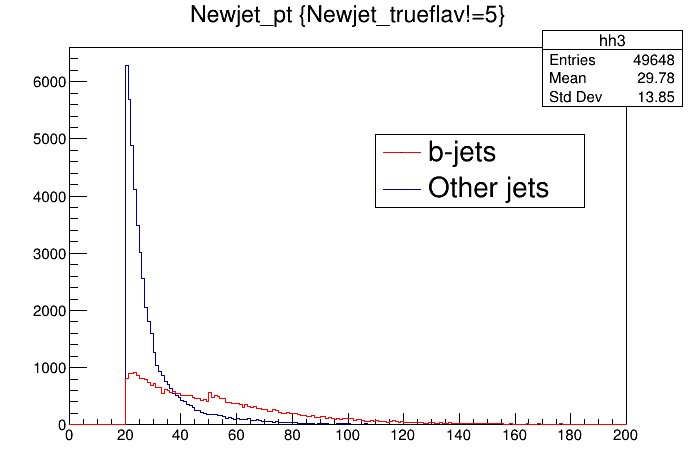

In [3]:
cc2 = TCanvas()
cc2.Draw()
leg = TLegend(0.54,0.56, 0.84,0.715)
NewMini.Draw("Newjet_pt>>hh3(200, 0,200)", "Newjet_trueflav!=5", "")
NewMini.Draw("Newjet_pt>>hh4(200, 0,200)", "Newjet_trueflav==5", "same")
jets = FileIn.Get("hh3")

bjet = FileIn.Get("hh4")
bjet.SetTitle("Leading jet p_{T}")
bjet.GetXaxis().SetTitle("Leading jet p_{T}")
bjet.GetYaxis().SetTitle("Entries")

bjet.SetLineColor(kRed)
leg.AddEntry(bjet, "b-jets")
leg.AddEntry(jets, "Other jets")
leg.Draw()
gPad.Update()